In [1]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats

# Redshift = 0 
#get gals, snaps, sims_props
snapshot_used_0 = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used_0)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]
print(reds)
print(snaps)

# using positions [x,y,x]
pos_x = gals["Pos_0"]
pos_y = gals["Pos_1"]
pos_z = gals["Pos_2"]

snaplist_index_used_0 = list(snaplist[0]).index(snapshot_used_0)# convert to list and find the index of the snap we are using
redshift_used_0 = snaplist[1][snaplist_index_used_0] # Get the redshift for corresponding snapshot
redshift_used_0 = str(round(redshift_used_0, 1)) # round float to nearest whole int

[4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
[100 115 134 158 173 192 216 250]


In [2]:
# REDSHIFT z = 4
snapshot_used_4 = 115 # z = 4
gals_4, sim_props_4, snaplist = get_gal_catalogue(snapshot_used_4) # get gals
ngals_4 = len(gals_4)
print(ngals_4)
#gals_4.columns #returns all avaiable properties of galxies
#gals_4[gals_4.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals_4.dropna()# drop nan values

# using positions [x,y,x]
pos_x_4 = gals_4["Pos_0"]
pos_y_4 = gals_4["Pos_1"]
pos_z_4 = gals_4["Pos_2"]

snaplist_index_used_4 = list(snaplist[0]).index(snapshot_used_4)# convert to list and find the index of the snap we are using
redshift_used_4 = snaplist[1][snaplist_index_used_4] # Get the redshift for corresponding snapshot
redshift_used_4 = str(round(redshift_used_4, 1)) # round float to nearest whole int


1267299


In [3]:
# Grid galaxies into box using their positions and a 
# multidimensional Histogram

# using positions [x,y,x]
#pos_x = gals["Pos_0"]
#pos_y = gals["Pos_1"]
#pos_z = gals["Pos_2"]

# Create 3D histogram with our galaxy points
# 100Mpc across (split into 100 square grid)
#nbins = 100
#N_gals, (bx, by, bz) = np.histogramdd( (pos_x, pos_y, pos_z), bins=(nbins, nbins, nbins) )
#N_gals_x = pos_x.hist(bins=nbins)
#N_gals_y = pos_y.hist(bins=nbins)
#N_gals_z = pos_z.hist(bins=nbins)

#print('N_gals_x', N_gals_x)
#print('N_gals_y', N_gals_y)
#print('N_gals_z', N_gals_z)

In [4]:
nbins = 100

# REDSHIFT 0

#(N_gals_x, N_gals_y, N_gals_z), (bx, by, bz) = np.histogramdd( (pos_x, pos_y, pos_z), bins=(nbins, nbins, nbins) ) # 3D hist
N_gals_x, bins_x = np.histogram(pos_x,bins=nbins)
N_gals_y, bins_y = np.histogram(pos_y,bins=nbins)
N_gals_z, bins_z = np.histogram(pos_z,bins=nbins)
print('N_gals_x:', N_gals_x)
print('N_gals_y:', N_gals_y)
print('N_gals_z:', N_gals_z)

total = (N_gals_x + N_gals_y + N_gals_z)
average = (N_gals_x + N_gals_y + N_gals_z) / 3
print('total:', total)
print('total shape:', total.shape)
print('average:', average)
print('average shape:', average.shape)

delta_x = (N_gals_x - average)/average
p_k_field, bins_field = get_power(delta_x, nbins)
p_k_field
bins_field

N_gals_x: [13725 12922 13933 14112 13712 14375 13525 13338 14345 14308 14943 13481
 13749 14629 14165 14131 13962 14238 14225 14571 12607 12072 11778 11457
 12465 12135 13243 14082 15834 15976 15671 16189 18325 17654 16515 14724
 14261 14645 14772 14814 14977 15047 14747 13850 14332 15009 16353 18268
 18412 19663 20146 18433 18433 20126 22485 20267 20003 19511 19243 19890
 20146 20935 21436 22668 23169 22463 21415 20905 20601 19870 19374 19128
 20003 22900 22415 23013 22696 23523 20452 18450 17454 16880 16196 16237
 17758 17509 15856 15394 14738 14556 13336 12075 12933 13553 14145 12865
 12778 13116 12772 13851]
N_gals_y: [17297 16718 16551 18916 20202 19616 16427 15125 14199 13325 13747 13878
 13325 13195 13665 13577 14353 13686 13062 13194 13483 12762 13420 13002
 13612 15271 15505 16482 18167 15236 14093 13718 13820 14456 15394 16797
 17414 16488 15044 14305 15335 15649 16925 17560 17386 18424 20440 20198
 17798 17558 20835 25140 24457 23279 20797 18354 17534 18503 17786 16860
 1547

array([0.0418879 , 0.12566371, 0.18849556, 0.25132741, 0.31415927,
       0.37699112, 0.43982297, 0.50265482, 0.56548668, 0.65973446,
       0.75398224, 0.81681409, 0.87964594, 0.9424778 , 1.00530965,
       1.0681415 , 1.13097336, 1.19380521, 1.28805299, 1.38230077,
       1.44513262, 1.50796447, 1.57079633, 1.63362818, 1.69646003,
       1.75929189, 1.82212374, 1.91637152, 2.0106193 , 2.07345115,
       2.136283  , 2.19911486, 2.26194671, 2.32477856, 2.38761042,
       2.45044227, 2.54469005, 2.63893783, 2.70176968, 2.76460154,
       2.82743339, 2.89026524, 2.95309709, 3.01592895, 3.0787608 ])

In [5]:
# REDSHIFT 0

#(N_gals_x_4, N_gals_y_4, N_gals_z_4), (bx, by, bz) = np.histogramdd( (pos_x, pos_y, pos_z), bins=(nbins, nbins, nbins) ) # 3D hist
N_gals_x_4, bins_x_4 = np.histogram(pos_x_4,bins=nbins)
N_gals_y_4, bins_y_4 = np.histogram(pos_y_4,bins=nbins)
N_gals_z_4, bins_z_4 = np.histogram(pos_z_4,bins=nbins)
print('N_gals_x_4:', N_gals_x_4)
print('N_gals_y_4:', N_gals_y_4)
print('N_gals_z_4:', N_gals_z_4)

total_4 = (N_gals_x_4 + N_gals_y_4 + N_gals_z_4)
average_4 = (N_gals_x_4 + N_gals_y_4 + N_gals_z_4) / 3
print('total:', total)
print('total shape:', total.shape)
print('average:', average)
print('average shape:', average.shape)

delta_x_4 = (N_gals_x_4 - average_4)/average_4
p_k_field_4, bins_field_4 = get_power(delta_x_4, nbins)
p_k_field_4
bins_field_4

N_gals_x_4: [10791 11215 10833 10941 11577 11389 10827 11136 11241 11249 11307 10852
 10813 11663 11300 10848 10372 11003 11086 11503 11069 10650 10526 10478
 10544 11102 12067 12459 12351 12532 12542 13129 13299 11317 11541 11154
 11740 11732 11646 11257 11103 12206 12162 13222 12514 12407 12946 13029
 13513 13265 13950 14844 14954 15256 15211 15137 14694 14530 13930 13217
 14354 14693 14419 15707 16123 15003 14887 15570 14736 14784 14563 15294
 14638 14743 14436 14475 13686 14638 15288 14200 14524 13627 12629 12778
 13075 13545 13457 12290 12802 12315 11530 11993 11663 11343 11378 11350
 11318 11266 10311 10697]
N_gals_y_4: [14961 14795 14424 14520 14004 13305 13881 13458 12647 11965 11109 10565
 10301 10182 10497 10369 10908 11567 11442 10766 10266 10345 11339 12242
 12466 12103 12215 11533 11866 11981 12835 13299 12955 12491 11706 12491
 11974 11775 11757 11759 12567 12525 12561 12931 13285 13998 13547 15137
 15077 14783 14863 15302 15428 13882 14192 14038 13375 13678 13741 13446
 

array([0.0418879 , 0.12566371, 0.18849556, 0.25132741, 0.31415927,
       0.37699112, 0.43982297, 0.50265482, 0.56548668, 0.65973446,
       0.75398224, 0.81681409, 0.87964594, 0.9424778 , 1.00530965,
       1.0681415 , 1.13097336, 1.19380521, 1.28805299, 1.38230077,
       1.44513262, 1.50796447, 1.57079633, 1.63362818, 1.69646003,
       1.75929189, 1.82212374, 1.91637152, 2.0106193 , 2.07345115,
       2.136283  , 2.19911486, 2.26194671, 2.32477856, 2.38761042,
       2.45044227, 2.54469005, 2.63893783, 2.70176968, 2.76460154,
       2.82743339, 2.89026524, 2.95309709, 3.01592895, 3.0787608 ])

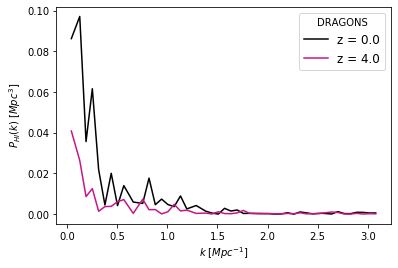

In [6]:
fig, ax = plt.subplots(1, 1)
label_z_0 = ("z = " + redshift_used_0)
label_z_4 = ("z = " + redshift_used_4)
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
ax.plot(bins_field,p_k_field,color="black", label=label_z_0)
ax.plot(bins_field_4,p_k_field_4,color="mediumvioletred", label=label_z_4)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

name_of_plot=("PowerSpectrum_test")
plt.savefig("plots/" + name_of_plot + ".pdf")